# Textual Sentiment Analysis

Files in folder:
['twitter_training.xlsx', 'twitter_validation.xlsx']
         ID          LOC     Label  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74595  9186       Nvidia  Positive   
74596  9186       Nvidia  Positive   
74597  9186       Nvidia  Positive   
74598  9187       Nvidia  Positive   
74599  9187       Nvidia  Positive   

                                                    text  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74595  RhandlerR HOLY SHIT these prices are so much l...  
7

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1634/1634 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3249 - loss: 1.3550 - val_accuracy: 0.4654 - val_loss: 1.2077
Epoch 2/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5358 - loss: 1.1093 - val_accuracy: 0.6387 - val_loss: 0.9206
Epoch 3/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6664 - loss: 0.8563 - val_accuracy: 0.6979 - val_loss: 0.7909
Epoch 4/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7364 - loss: 0.7002 - val_accuracy: 0.7137 - val_loss: 0.7474
Epoch 5/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7797 - loss: 0.5944 - val_accuracy: 0.7479 - val_loss: 0.6661
Epoch 6/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8152 - loss: 0.5019 - val_accuracy: 0.7824 - val_loss: 0.5816
Epoch 7/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8416 - loss: 0.4406 - val_accuracy: 0.7957 - val_loss: 0.5546
Epoch 8/19
1634/1634 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8562 - loss: 0.3989 -

Final Training Accuracy: 0.9121
Final Validation Accuracy: 0.8609


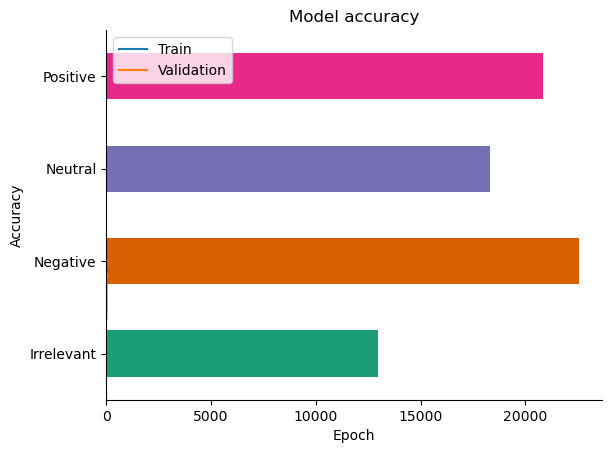

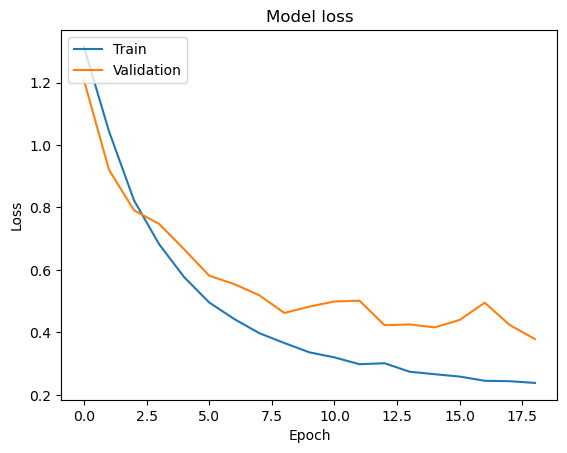

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_4_1/Cast:0", shape=(32, 100), dtype=float32). Expected shape (None, 13, 174, 1), but input has incompatible shape (32, 100)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 100), dtype=int32)
  • training=False
  • mask=None

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


# Define the path to the Excel file
file_path = r'C:\Users\Admin\Downloads\Text Sentiment Analysis Datasets\twitter_training.xlsx'

# Optional: Check files in the folder to confirm the file name
print("Files in folder:")
print(os.listdir(r'C:\Users\Admin\Downloads\Text Sentiment Analysis Datasets'))

# Load the Excel file
df = pd.read_excel(file_path, engine='openpyxl')  # Use 'openpyxl' for .xlsx

# Show the first few rows
print(df.head(74600))

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from sklearn.model_selection import train_test_split

texts = df['text'].values
labels = df['Label'].values

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    texts, labels, test_size=0.3, random_state=42)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42)

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_labels_cat = to_categorical(train_labels_encoded)
val_labels_cat = to_categorical(val_labels_encoded)
test_labels_cat = to_categorical(test_labels_encoded)


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


tokenizer = Tokenizer()
train_texts = [str(text) for text in train_texts]
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

train_sequences = tokenizer.texts_to_sequences(train_texts)

val_texts = np.nan_to_num(val_texts, nan="", posinf="", neginf="")
val_texts = [str(text) for text in val_texts]
val_sequences = tokenizer.texts_to_sequences(val_texts)

test_texts = np.nan_to_num(test_texts, nan="", posinf="", neginf="")
test_texts = [str(text) for text in test_texts]
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
val_data = pad_sequences(val_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

from tensorflow.keras.layers import Embedding

embedding_dim = 128
embedding_layer = Embedding(vocab_size, embedding_dim, input_length=max_length)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size = len(tokenizer.word_index) + 1

text_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(train_labels_cat.shape[1], activation='softmax')
])
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

vocab_size = len(tokenizer.word_index) + 1

text_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dense(train_labels_cat.shape[1], activation='softmax')
])

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)


num_classes = len(label_encoder.classes_)

train_labels_cat = to_categorical(train_labels_encoded, num_classes=num_classes)
val_labels_cat = to_categorical(val_labels_encoded, num_classes=num_classes)
test_labels_cat = to_categorical(test_labels_encoded, num_classes=num_classes)

text_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = text_model.fit(train_data, train_labels_cat, epochs=19, validation_data=(val_data, val_labels_cat))

final_train_acc = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")

final_val_acc = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

import pickle

# Save model
text_model.save("text_sentiment_model.h5")

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Save label classes separately (optional)
np.save("label_classes.npy", label_encoder.classes_)


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#testing

from sklearn.metrics import classification_report, accuracy_score

y_pred_probs = model.predict(test_data)
y_pred = y_pred_probs.argmax(axis=1)

test_labels_numerical = label_encoder.transform(test_labels)

print("Test Accuracy:", accuracy_score(test_labels_numerical, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_labels_encoded = label_encoder.transform(test_labels)

cm = confusion_matrix(test_labels_encoded, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import classification_report
import numpy as np

test_labels_encoded = label_encoder.transform(test_labels)
y_pred = np.array(y_pred)
unique_labels = np.unique(np.concatenate([test_labels_encoded, y_pred]))
class_names = [label_encoder.classes_[i] for i in unique_labels]

report = classification_report(test_labels_encoded, y_pred, labels=unique_labels, target_names=class_names)
report_lines = report.splitlines()
filtered_report = "\n".join([line for line in report_lines if "accuracy" not in line.lower()])

print(filtered_report)

#save and load the model

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# Load saved model
text_model = load_model("text_sentiment_model.h5")

# Load tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Load label encoder
with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Set max_length same as during training
max_length = 100

# Prediction function
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length)
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction)
    return predicted_label, confidence

# Predict for example sentences
sentences = [
    "I'm so happy with the results!",
    "This is the worst experience I've ever had.",
    "I don't feel strongly about it either way.",
    "Absolutely fantastic product and service!",
    "Totally disappointed, waste of time."
]

for text in sentences:
    sentiment, confidence = predict_sentiment(text)
    print(f"\nText: {text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")


#predictions

# Example sentence(s) already provided in the code
sentences = [
    "I'm so happy with the results!",
    "This is the worst experience I've ever had.",
    "I don't feel strongly about it either way.",
    "Absolutely fantastic product and service!",
    "Totally disappointed, waste of time."
]

# Prediction function
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100)  # same max_length used during training
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction)
    return predicted_label, confidence

# Predict sentiment for each sentence
for text in sentences:
    sentiment, confidence = predict_sentiment(text)
    print(f"\nText: {text}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import load_model
import pickle

# Load saved model and supporting objects
text_model = load_model("text_sentiment_model.h5")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Set max_length same as used during training
max_length = 100

# Function to preprocess and predict sentiment
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(text_seq, maxlen=max_length)
    prediction = model.predict(padded)
    predicted_class = np.argmax(prediction)
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]
    confidence = np.max(prediction)
    return predicted_label, confidence

# Real-time input loop
while True:
    user_input = input("\nEnter a sentence to predict sentiment (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting real-time sentiment predictor.")
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")




# Speech Sentiment Analysis

C:\Users\Admin\Downloads
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


  0%|          | 0/1152 [00:00<?, ?it/s]C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,
100%|██████████| 288/288 [00:13<00:00, 21.67it/s]


(1152, 13, 174, 1)
(288, 13, 174, 1)
Input shape: (13, 174, 1)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 174, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 87, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 87, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 43, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 43, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 129, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 129, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 283,016 (1.08 MB)

 Trainable params: 283,016 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 544ms/step - accuracy: 0.1617 - loss: 2.0582 - val_accuracy: 0.1861 - val_loss: 1.9809
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 494ms/step - accuracy: 0.2225 - loss: 1.9633 - val_accuracy: 0.2684 - val_loss: 1.9175
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 526ms/step - accuracy: 0.2794 - loss: 1.8873 - val_accuracy: 0.3074 - val_loss: 1.8254
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 525ms/step - accuracy: 0.2901 - loss: 1.7977 - val_accuracy: 0.3290 - val_loss: 1.7842
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 526ms/step - accuracy: 0.3205 - loss: 1.7829 - val_accuracy: 0.3506 - val_loss: 1.7090
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.3714 - loss: 1.6248 - val_accuracy: 0.3636 - val_loss: 1.7241
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 487ms/step - accuracy: 0.3773 - loss: 1.6543 - val_accuracy: 0.3463 - val_loss: 1.6476
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 486ms/step - accuracy: 0.4188 - loss: 1.5612 - val_accu

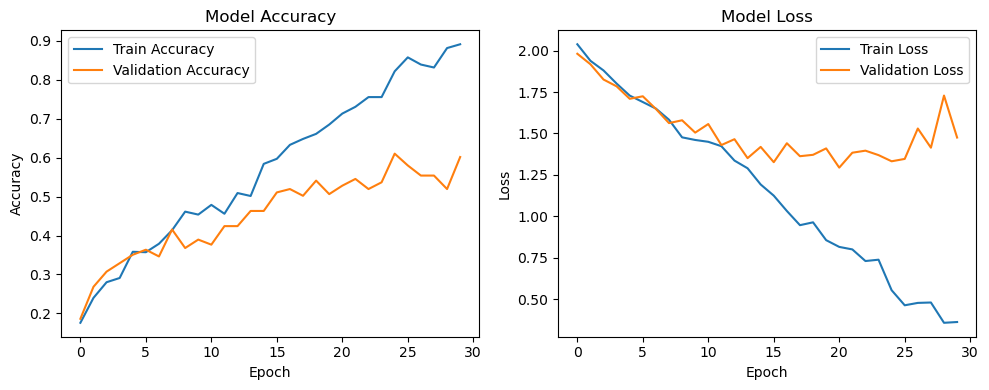

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.81      0.58      0.68        38
        calm       0.92      0.32      0.47        38
     disgust       0.56      0.87      0.68        38
        fear       0.43      0.51      0.47        39
       happy       0.45      0.36      0.40        39
     neutral       0.48      0.79      0.60        19
         sad       0.37      0.37      0.37        38
    surprise       0.60      0.64      0.62        39

    accuracy                           0.54       288
   macro avg       0.58      0.55      0.53       288
weighted avg       0.58      0.54      0.53       288



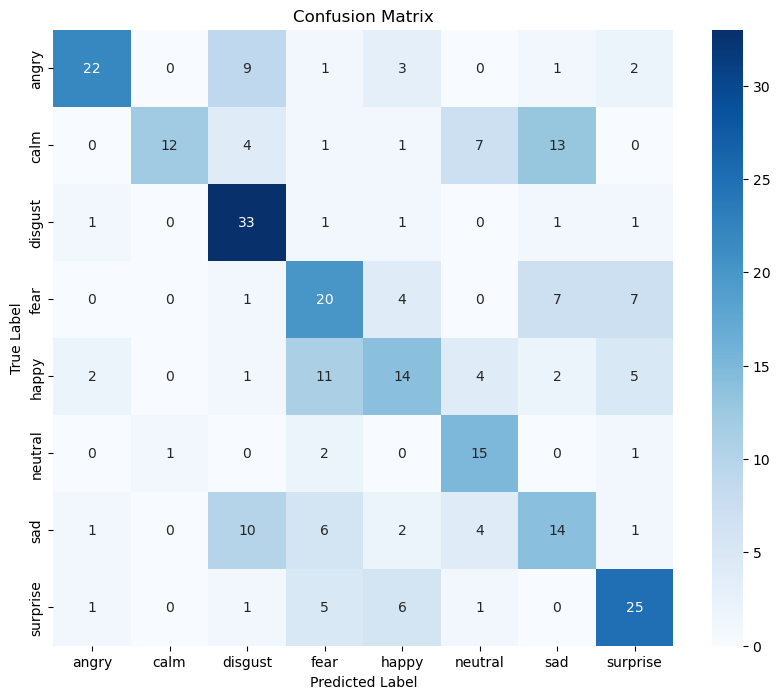

🎙️ Recording started...
✅ Recording saved as: realtime_input.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
🧠 Predicted Emotion: surprise
🎙️ Recording started...
✅ Recording saved as: realtime_input.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
🧠 Predicted Emotion: surprise


In [17]:
!pip install librosa numpy pandas scikit-learn matplotlib seaborn tensorflow

!pip install opendatasets

pip install sounddevice scipy librosa

import opendatasets as od

dataset = r'C:\Users\Admin\Downloads\Speech Sentiment Analysis Datasets\RAVDESS'

import os
print(os.getcwd())  # current working directory
print(os.listdir(dataset)) 

import os
import pandas as pd

def map_emotion(code):
    emotion_map = {
        1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad',
        5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
    }
    return emotion_map.get(code, 'unknown')

def load_ravdess_data(data_dir=dataset):
    file_paths = []
    emotions = []

    for actor_folder in os.listdir(data_dir):
        actor_path = os.path.join(data_dir, actor_folder)
        if os.path.isdir(actor_path):
            for file in os.listdir(actor_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(actor_path, file)
                    emotion_code = int(file.split('-')[2])
                    file_paths.append(file_path)
                    emotions.append(map_emotion(emotion_code))

    return pd.DataFrame({'path': file_paths, 'emotion': emotions})

# Load the data
ravdess_df = load_ravdess_data(dataset)  # change if your path is different
ravdess_df.head()

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ravdess_df, test_size=0.2, stratify=ravdess_df['emotion'])


import librosa
import numpy as np
from tqdm import tqdm  # optional for progress bar

def extract_mfcc(file_path, n_mfcc=13, max_pad_len=174):
    try:
        audio, sr = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros((n_mfcc, max_pad_len))

# 🎯 Label encode emotions
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ravdess_df['emotion_encoded'] = label_encoder.fit_transform(ravdess_df['emotion'])

# 🔀 Train-test split
train_df, test_df = train_test_split(
    ravdess_df,
    test_size=0.2,
    stratify=ravdess_df['emotion_encoded'],
    random_state=42
)

# ⛏️ Extract MFCCs
X_train = np.array([extract_mfcc(p) for p in tqdm(train_df['path'])])
X_test = np.array([extract_mfcc(p) for p in tqdm(test_df['path'])])

# 🧠 Prepare inputs
X_train = X_train[..., np.newaxis]  # (samples, 13, 174, 1)
X_test = X_test[..., np.newaxis]

y_train = train_df['emotion_encoded'].values
y_test = test_df['emotion_encoded'].values


print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['emotion'])
y_test = label_encoder.transform(test_df['emotion'])

print("Input shape:", X_train.shape[1:])  # Should be (13, 174, 1)

from tensorflow.keras import models, layers

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=input_shape),  # (13, 174, 1)

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

        layers.Reshape((-1, 128)),  # Flatten H/W for LSTM

        layers.LSTM(128, return_sequences=True),
        layers.LSTM(64),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = X_train.shape[1:]  # Make sure this is (13, 174, 1)
num_classes = len(label_encoder.classes_)

model = build_model(input_shape, num_classes)
model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")

# 📈 Plot training history
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


import sounddevice as sd
import scipy.io.wavfile as wav
import librosa
import numpy as np
import os

def record_audio(filename="realtime_input.wav", duration=5, fs=22050):
    print("🎙️ Recording started...")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    wav.write(filename, fs, recording)
    print("✅ Recording saved as:", filename)

def extract_mfcc_for_realtime(file_path, n_mfcc=13, max_pad_len=174):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc.reshape(1, 13, 174, 1)

def predict_emotion(model, label_encoder):
    # Step 1: Record audio
    record_audio()

    # Step 2: Extract MFCC
    mfcc_features = extract_mfcc_for_realtime("realtime_input.wav")

    # Step 3: Predict
    predictions = model.predict(mfcc_features)
    predicted_index = np.argmax(predictions)
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    print("🧠 Predicted Emotion:", predicted_label)

# 🔄 Call this function to predict in real-time
predict_emotion(model, label_encoder)


import sounddevice as sd
import scipy.io.wavfile as wav
import librosa
import numpy as np
import os

def record_audio(filename="realtime_input.wav", duration=3, fs=22050):
    print("🎙️ Recording started...")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    wav.write(filename, fs, recording)
    print("✅ Recording saved as:", filename)

def extract_mfcc_for_realtime(file_path, n_mfcc=13, max_pad_len=174):
    y, sr = librosa.load(file_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_pad_len:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc.reshape(1, 13, 174, 1)

def predict_emotion(model, label_encoder):
    # Step 1: Record audio
    record_audio()

    # Step 2: Extract MFCC
    mfcc_features = extract_mfcc_for_realtime("realtime_input.wav")

    # Step 3: Predict
    predictions = model.predict(mfcc_features)
    predicted_index = np.argmax(predictions)
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]

    print("🧠 Predicted Emotion:", predicted_label)

# 🔄 Call this function to predict in real-time
predict_emotion(model, label_encoder)





In [10]:
# Save text model
text_model.save("text_emotion_model.h5")

# Save tokenizer
with open("text_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open("text_label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


In [25]:
# Save model
model.save("speech_emotion_model.h5")

from sklearn.preprocessing import LabelEncoder
import pickle

# Define the 8 speech emotion classes exactly as your model expects
speech_emotions = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Create and fit the label encoder
speech_label_encoder = LabelEncoder()
speech_label_encoder.fit(speech_emotions)

# Save the encoder to a file (make sure the path matches your GUI code)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(speech_label_encoder, f)

print("Speech label encoder saved with classes:", speech_label_encoder.classes_)



Speech label encoder saved with classes: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


# GUI

In [29]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import sounddevice as sd
import scipy.io.wavfile as wav
import librosa
import os
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load models and encoders
# Load models and encoders
speech_model = load_model("speech_emotion_model.h5")
text_model = load_model("text_emotion_model.h5")

# This should be the speech label encoder with 8 classes
with open("label_encoder.pkl", "rb") as f:
    speech_label_encoder = pickle.load(f)
    print("Speech Label Encoder Classes:", speech_label_encoder.classes_)
    print("Number of classes:", len(speech_label_encoder.classes_))
    # Make sure this prints 8 classes matching your speech emotion set

with open("text_tokenizer.pkl", "rb") as f:
    text_tokenizer = pickle.load(f)

with open("text_label_encoder.pkl", "rb") as f:
    text_label_encoder = pickle.load(f)


# --- Speech Functions ---
def record_audio(filename="realtime_input.wav", duration=5, fs=22050):
    try:
        status_label.config(text="🎙️ Recording...")
        window.update_idletasks()
        recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
        sd.wait()
        wav.write(filename, fs, recording)
        status_label.config(text="✅ Recorded successfully!")
        window.update_idletasks()
    except Exception as e:
        messagebox.showerror("Recording Error", str(e))

def extract_mfcc(file_path, n_mfcc=13, max_pad_len=174):
    try:
        y, sr = librosa.load(file_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        if mfcc.shape[1] < max_pad_len:
            mfcc = np.pad(mfcc, ((0, 0), (0, max_pad_len - mfcc.shape[1])), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]
        return mfcc.reshape(1, 13, 174, 1)
    except Exception as e:
        messagebox.showerror("MFCC Error", str(e))
        return None

def predict_speech_emotion():
    try:
        record_audio()
        mfcc = extract_mfcc("realtime_input.wav")
        if mfcc is not None:
            pred = speech_model.predict(mfcc)
            pred_label = speech_label_encoder.inverse_transform([np.argmax(pred)])[0]
            speech_result_label.config(text=f"🗣️ Emotion: {pred_label}")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# --- Text Functions ---
def predict_text_emotion():
    text = text_input.get("1.0", tk.END).strip()
    if not text:
        messagebox.showwarning("Input Error", "Please enter a sentence.")
        return
    try:
        seq = text_tokenizer.texts_to_sequences([text])
        padded = pad_sequences(seq, maxlen=100)  # Ensure same as training
        pred = text_model.predict(padded)
        pred_label = text_label_encoder.inverse_transform([np.argmax(pred)])[0]
        text_result_label.config(text=f"📝 Emotion: {pred_label}")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# --- GUI Setup ---
window = tk.Tk()
window.title("Speech + Text Emotion Detector")
window.geometry("500x600")
window.configure(bg="#f0f0f0")

tk.Label(window, text="🎤 Speech & 📝 Text Emotion Detection", font=("Helvetica", 16, "bold"), bg="#f0f0f0").pack(pady=15)

# --- Text Prediction Section ---
tk.Label(window, text="Enter Text:", font=("Helvetica", 12), bg="#f0f0f0").pack()
text_input = tk.Text(window, height=4, width=50, font=("Helvetica", 11))
text_input.pack(pady=5)

tk.Button(window, text="Predict Text Emotion", font=("Helvetica", 12), bg="#2196F3", fg="white",
          command=predict_text_emotion).pack(pady=5)

text_result_label = tk.Label(window, text="📝 Emotion: ", font=("Helvetica", 12, "bold"), bg="#f0f0f0")
text_result_label.pack(pady=5)

tk.Label(window, text="─" * 100, bg="#f0f0f0", fg="gray").pack()
print("Model output shape:", speech_model.output_shape)

# --- Speech Prediction Section ---
tk.Label(window, text="Speak for 5 seconds...", font=("Helvetica", 12), bg="#f0f0f0").pack(pady=10)

tk.Button(window, text="Record & Predict Speech Emotion", font=("Helvetica", 12),
          bg="#4CAF50", fg="white", command=predict_speech_emotion).pack(pady=5)

speech_result_label = tk.Label(window, text="🗣️ Emotion: ", font=("Helvetica", 12, "bold"), bg="#f0f0f0")
speech_result_label.pack(pady=5)

status_label = tk.Label(window, text="", font=("Helvetica", 10), bg="#f0f0f0", fg="gray")
status_label.pack(pady=5)

tk.Button(window, text="Exit", font=("Helvetica", 12), bg="#d9534f", fg="white", command=window.quit).pack(pady=20)

window.mainloop()
print("Loaded speech_label_encoder classes:", speech_label_encoder.classes_)
print("Number of classes:", len(speech_label_encoder.classes_))




Speech Label Encoder Classes: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Number of classes: 8
Model output shape: (None, 8)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Loaded speech_label_encoder classes: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Number of classes: 8
